In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

# Data Cleaning

In [5]:
DATA_DIR = "./data.csv"

In [6]:
dat=pd.read_csv(DATA_DIR,encoding='utf-8')

In [7]:
dat = dat.drop(dat.columns[0], axis=1)

In [8]:
dat.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [9]:
# Removing spaces in the column names to enable easy column reference  
dat.columns = dat.columns.str.replace(' ','')

In [10]:
# Removing special characters (e.g. euro dollar sign)
euro_sign = dat['ReleaseClause'][0][0]

dat['ReleaseClause'] = dat['ReleaseClause'].str.replace(euro_sign,'')
dat['Value'] = dat['Value'].str.replace(euro_sign,'')
dat['Wage'] = dat['Wage'].str.replace(euro_sign,'')
dat['ReleaseClause'] = dat['ReleaseClause'].str.replace('M','') # Removing Millions in the field
dat['Value'] = dat['Value'].str.replace('M','') # Removing Millions in the field
dat['Wage'] = dat['Wage'].str.replace('K','') # Removing Thousands in the field

# Converting wages,release clause, value from string into integers/float
dat.ReleaseClause = pd.to_numeric(dat.ReleaseClause, errors='coerce')
dat.Value = pd.to_numeric(dat.Value, errors='coerce')
dat.Wage = pd.to_numeric(dat.Wage, errors='coerce')
dat.Age = pd.to_numeric(dat.Age, errors='coerce')

# Converting Weight from string into integers/float
dat['Weight'] = dat['Weight'].str.replace('lbs','') # Removing lbs in the field
dat.Weight = pd.to_numeric(dat.Weight, errors='coerce')
# Use Regular Expression to convert Height from feet + inches into cm. Convert from text into integer
r = re.compile(r"([0-9]+)'([0-9]+)")    # to set the pattern e.g. 5'7 , 4'12 etc
def get_cm(height):
    height = str(height)
    m = r.match(height)
    if m == None:
        return float('NaN')
    else:
        return float(m.group(1))*30.48 + float(m.group(2))*2.54
dat["Height"] = dat["Height"].apply(lambda x:get_cm(x))

In [11]:
# Drop unnecessary columns that are not used for analyzing a player's performance
# This inclues: 'Real Face', 'Jersey Number', 'Loaned From' LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM
# CDM, RDM, RWB LB, LCB, CB, RCB, RB
# dat = dat.drop(dat.columns[27:53], axis = 1)
dat = dat.drop(labels = ['RealFace','JerseyNumber','LoanedFrom'], axis = 1)
dat.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,ClubLogo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4


In [12]:
dat.dropna(inplace=True)
print(dat.shape)

(5748, 85)


In [13]:
for i in range(24, 50):
    dat[dat.columns[i]] = pd.to_numeric(dat[dat.columns[i]].apply(lambda x:x[:-2]))
dat[dat.columns[24:50]]

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,88,88,88,92,93,93,93,92,93,93,...,64,61,61,61,64,59,47,47,47,59
1,91,91,91,89,90,90,90,89,88,88,...,65,61,61,61,65,61,53,53,53,61
2,84,84,84,89,89,89,89,89,89,89,...,65,60,60,60,65,60,47,47,47,60
4,82,82,82,87,87,87,87,87,88,88,...,77,77,77,77,77,73,66,66,66,73
5,83,83,83,89,88,88,88,89,89,89,...,66,63,63,63,66,60,49,49,49,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292,57,57,57,62,61,61,61,62,62,62,...,51,47,47,47,51,48,41,41,41,48
11323,60,60,60,64,62,62,62,64,60,60,...,48,40,40,40,48,44,35,35,35,44
11457,63,63,63,63,63,63,63,63,61,61,...,46,41,41,41,46,44,37,37,37,44
11682,59,59,59,63,61,61,61,63,61,61,...,49,43,43,43,49,46,37,37,37,46


In [14]:
# Check for missing values
# Check if there any null values in the dataset
dat.isna().values.any() # There are indeed missing values in some rows in the dataset

False

In [15]:
'''
The equations here require future discussion.
'''
# Develop the FIFA attributes: Pace, Shooting, Passing, Dribbling, Defending, Physical
# Each of these attributes are made up of the following skills (https://www.fifauteam.com/fifa-18-attributes-guide/)
# Pace: Sprint Speed, Acceleration
# Shooting: FINISHING, LONG SHOTS, PENALTIES, POSITIONING, SHOT POWER, VOLLEYS
# PASSING: CROSSING, CURVE, FREE KICK, LONG PASSING, SHORT PASSING, VISION
# DRIBBLING: AGILITY, BALANCE, BALL CONTROL, COMPOSURE, DRIBBLING, REACTIONS
# DEFENDING: HEADING, INTERCEPTIONS, MARKING, SLIDING TACKLE, STANDING TACKLE
# PHYSICAL: AGGRESSION, JUMPING, STAMINA, STRENGTH
# GOALKEEPING: DIVING, HANDLING, KICKING, POSITIONING
dat['Pace'] = ( dat['SprintSpeed'] + dat['Acceleration'] ) /2 
dat['Shooting'] = ( dat['Finishing'] + dat['LongShots'] + dat['Penalties'] + dat['Positioning'] + dat['ShotPower'] + dat['Volleys'] ) / 6
dat['Passing'] = ( dat['Crossing'] + dat['Curve'] + dat['FKAccuracy'] + dat['LongPassing'] + dat['ShortPassing'] + dat['Vision'] ) / 6
dat['Dribbling Skill'] = ( dat['HeadingAccuracy'] + dat['Interceptions'] + dat['Marking'] + dat['StandingTackle'] + dat['SlidingTackle'] ) / 5
dat['Physical'] = ( dat['Aggression'] + dat['Jumping'] + dat['Stamina'] + dat['Strength'] ) / 4
dat['Goal Keeping'] = ( dat['GKDiving'] + dat['GKHandling'] + dat['GKKicking'] + dat['GKPositioning'] ) / 4
dat.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,ClubLogo,...,GKKicking,GKPositioning,GKReflexes,ReleaseClause,Pace,Shooting,Passing,Dribbling Skill,Physical,Goal Keeping
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,15.0,14.0,8.0,226.5,88.5,88.166667,90.333333,35.8,61.75,11.50
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,15.0,14.0,11.0,127.1,90.0,91.500000,80.166667,40.0,81.25,11.75
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,15.0,15.0,11.0,228.1,92.0,83.833333,83.833333,36.4,61.75,12.00
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,5.0,10.0,13.0,196.4,77.0,85.333333,89.666667,58.6,76.00,10.75
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,6.0,8.0,8.0,172.1,91.0,83.166667,84.000000,37.0,64.75,9.25


# Top 10 player overview

In [16]:
# The top 10 players based on the overall score are:
top_10 = dat.loc[dat['Position']!='GK'].nlargest(10, 'Overall')
top_10.set_index(pd.Series(range(10)), inplace=True)
top_10[['Name','Overall','Club','Position', 'Physical']]

,Name,Overall,Club,Position,Physical
0,L. Messi,94,FC Barcelona,RF,61.75
1,Cristiano Ronaldo,94,Juventus,ST,81.25
2,Neymar Jr,92,Paris Saint-Germain,LW,61.75
3,K. De Bruyne,91,Manchester City,RCM,76.00
4,E. Hazard,91,Chelsea,LF,64.75
5,L. Modrić,91,Real Madrid,RCM,69.25
6,L. Suárez,91,FC Barcelona,RS,82.25
7,Sergio Ramos,91,Real Madrid,RCB,87.00
8,R. Lewandowski,90,FC Bayern München,ST,81.50
9,T. Kroos,90,Real Madrid,LCM,59.50


In [17]:
a = dat.loc[dat['Position']!='GK']
a.nlargest(10, 'Overall')

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,ClubLogo,...,GKKicking,GKPositioning,GKReflexes,ReleaseClause,Pace,Shooting,Passing,Dribbling Skill,Physical,Goal Keeping
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,15.0,14.0,8.0,226.5,88.5,88.166667,90.333333,35.8,61.75,11.50
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,15.0,14.0,11.0,127.1,90.0,91.500000,80.166667,40.0,81.25,11.75
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,15.0,15.0,11.0,228.1,92.0,83.833333,83.833333,36.4,61.75,12.00
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,5.0,10.0,13.0,196.4,77.0,85.333333,89.666667,58.6,76.00,10.75
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,6.0,8.0,8.0,172.1,91.0,83.166667,84.000000,37.0,64.75,9.25
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,7.0,14.0,9.0,137.4,76.0,78.333333,87.000000,69.4,69.25,10.75
7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,31.0,33.0,37.0,164.0,80.5,88.166667,79.500000,52.6,82.25,29.00
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,9.0,7.0,11.0,104.6,75.5,66.500000,71.666667,90.2,87.00,8.75
10,188545,R. Lewandowski,29,https://cdn.sofifa.org/players/4/19/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,90,90,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,...,12.0,8.0,10.0,127.1,77.5,88.500000,75.000000,43.8,81.50,10.25
11,182521,T. Kroos,28,https://cdn.sofifa.org/players/4/19/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,13.0,7.0,10.0,156.8,63.0,81.500000,88.166667,71.2,59.50,10.25


In [18]:
# The best players in each position are (based on the overall score):
pd.set_option('display.max_columns', None)
top_3_position = dat.groupby(['Position']).apply(lambda x: x.sort_values(['Overall'],ascending = False) )
# top_3_position.groupby(level=0).head(1).sort_values(['Overall'],ascending = False)

In [19]:
# Function for plotting a radar plot. Taken from (https://stackoverflow.com/questions/52910187/how-to-make-a-polygon-radar-spider-chart-in-python)

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels, fontsize=16)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)


        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)


                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

In [20]:
def radarPlot(data, save=False, fname=""):
    '''
    
    '''
    assert isinstance(data, pd.DataFrame)
    assert isinstance(save, bool)
    assert isinstance(fname, str)
    radar_plot_data = data[['Pace','Shooting','Passing','Dribbling','Physical','Goal Keeping']]
    radar_plot_data  = radar_plot_data.values.tolist()
    
    theta = radar_factory(6, frame='polygon') # Since there are 6 attributes: Pace, Shooting,...,Goal Keeping
    spoke_labels = ['Pace','Shooting','Passing','Dribbling','Physical','Goal Keeping']

    i = 0
    for d in radar_plot_data:
        count = data.index[i]
        fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
        fig.subplots_adjust(top=0.85, bottom=0.05)
        ax.set_rgrids([0,20,40, 60, 80])
        ax.set_title(data['Name'][count] +" | "+ " Overall-" + str(data['Overall'][count]) + " | "+ " Pos-"+ data['Position'][count] + " | "+ " Wage- \u20ac" + str(data['Wage'][count])+"K",  position=(0.5, 1.1), ha='center',fontsize=16)
        i += 1
        line = ax.plot(theta, d, linewidth=1, linestyle='solid')
        ax.fill(theta, d,  alpha=0.25)
        ax.set_varlabels(spoke_labels)
        if save:
            plt.savefig(fname+'_'+data['Name'][data.index[i-1]]+'.png')

    plt.show()

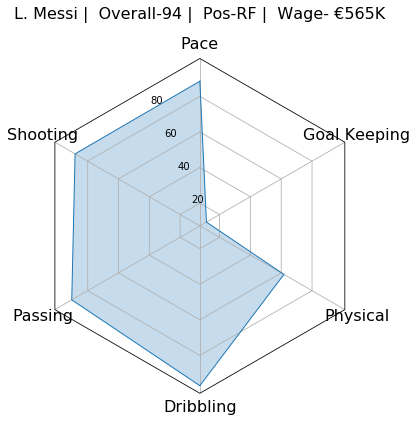

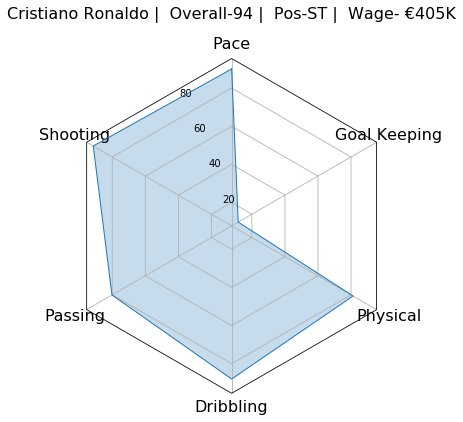

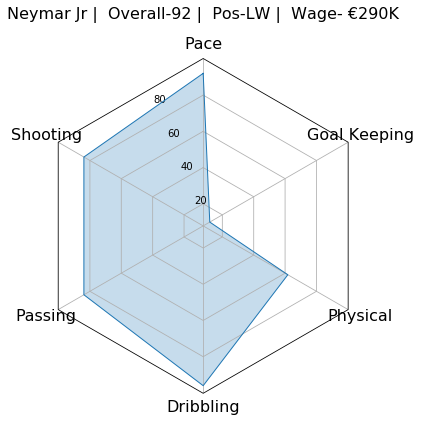

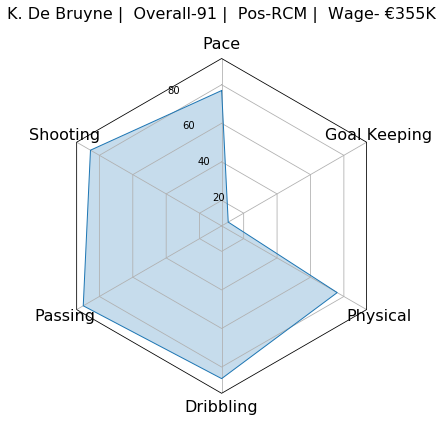

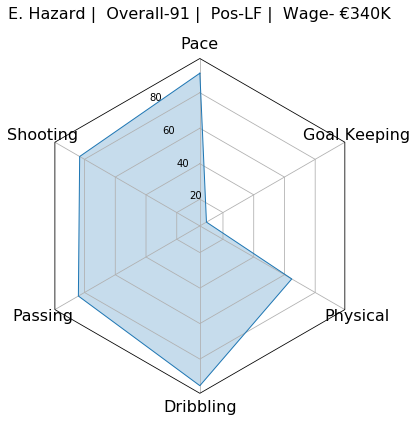

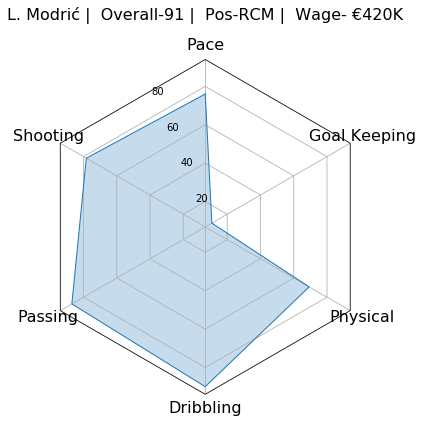

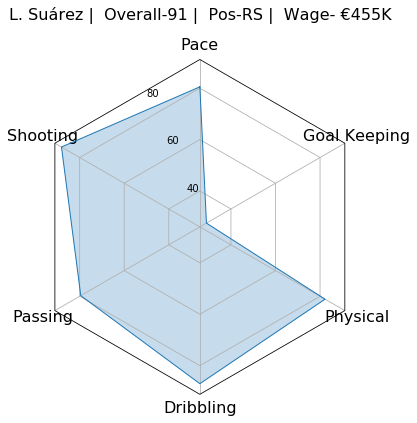

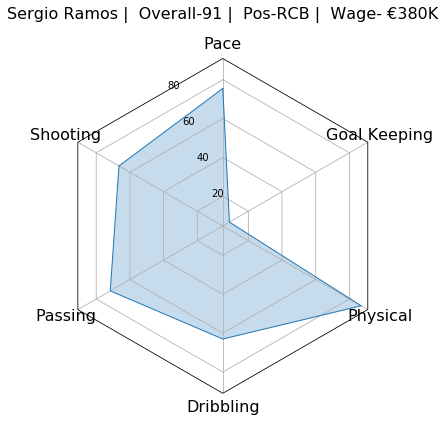

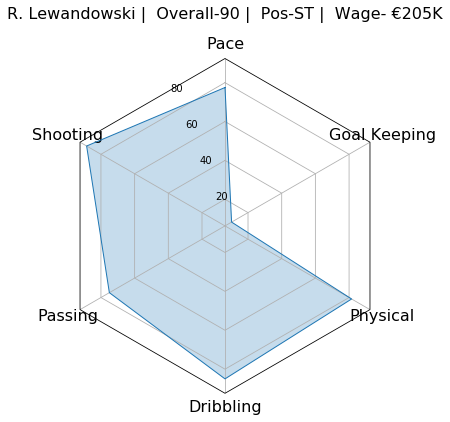

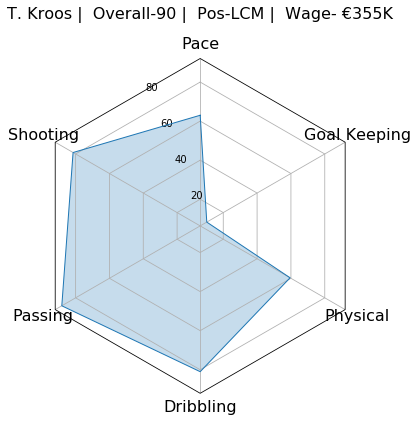

In [21]:
radarPlot(top_10)

In [22]:
dat[(dat['Age']<31) & (dat['Age']>24)]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,ClubLogo,Value,Wage,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,Position,Joined,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,Pace,Shooting,Passing,Dribbling Skill,Physical,Goal Keeping
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,118.5,290,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,"Aug 3, 2017",2022,175.26,150.0,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1,92.0,83.833333,83.833333,36.4,61.75,12.00
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,102.0,355,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,"Aug 30, 2015",2023,180.34,154.0,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4,77.0,85.333333,89.666667,58.6,76.00,10.75
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,93.0,340,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,LF,"Jul 1, 2012",2020,172.72,163.0,83,83,83,89,88,88,88,89,89,89,89,89,82,82,82,89,66,63,63,63,66,60,49,49,49,60,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172.1,91.0,83.166667,84.000000,37.0,64.75,9.25
10,188545,R. Lewandowski,29,https://cdn.sofifa.org/players/4/19/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,90,90,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,77.0,205,2152,Right,4.0,4.0,4.0,High/ Medium,Normal,ST,"Jul 1, 2014",2021,182.88,176.0,87,87,87,83,86,86,86,83,83,83,83,81,77,77,77,81,61,62,62,62,61,58,57,57,57,58,62.0,91.0,85.0,83.0,89.0,85.0,77.0,86.0,65.0,89.0,77.0,78.0,78.0,90.0,78.0,88.0,84.0,78.0,84.0,84.0,80.0,39.0,91.0,77.0,88.0,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,127.1,77.5,88.500000,75.000000,43.8,81.50,10.25
11,182521,T. Kroos,28,https://cdn.sofifa.org/players/4/19/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,76.5,355,2190,Right,4.0,5.0,3.0,Medium/ Medium,Normal,LCM,"Jul 17, 2014",2022,182.88,168.0,78,78,78,81,82,82,82,81,84,84,84,82,86,86,86,82,79,82,82,82,79,77,72,72,72,77,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,93.0,90.0,64.0,62.0,70.0,89.0,71.0,87.0,30.0,75.0,73.0,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,156.8,63.0,81.500000,88.166667,71.2,59.50,10.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8241,243591,Fernando Andrade,25,https://cdn.sofifa.org/players/4/19/243591.png,Brazil,https:

# General Analysis

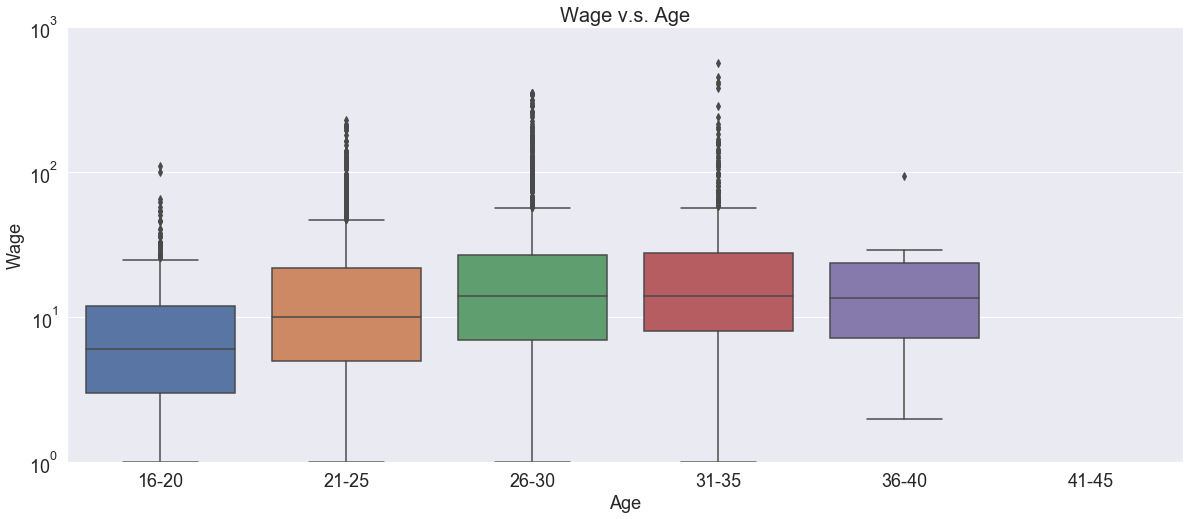

In [23]:
from math import ceil
age_group_strs = ['16-20', '21-25', '26-30', '31-35', '36-40', '41-45']
age_groups = [age_group_strs[ceil(age/5.0)-4] for age in dat['Age']]
dat['AgeGroup'] = age_groups
sns.set(rc={'figure.figsize':(20,8), 'font.size':20})
ax = sns.boxplot(x='AgeGroup', y='Wage', data=dat[dat['Value']>0], order=age_group_strs)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.set_yscale("log")
ax.set_ylabel('Wage', fontsize=18)
ax.set_xlabel('Age', fontsize=18)
ax.set_title('Wage v.s. Age', fontsize=20)
ax.set(ylim=(1,1000))
plt.savefig('wage_age.png')

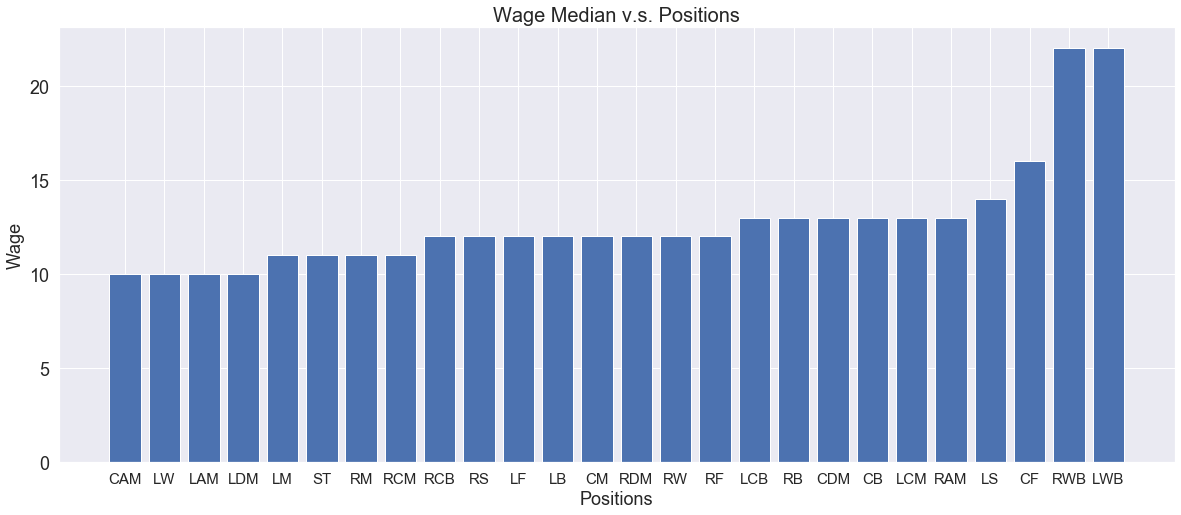

In [24]:
positions = list(set(dat['Position'].values))
pos_wage = [[positions[i], int(dat.loc[dat['Position']==positions[i]]['Wage'].median())] for i in range(len(positions))]
pos_wage.sort(key=lambda x:x[1])
sns.set(rc={'figure.figsize':(20,8)})
plt.bar([pos_wage[i][0] for i in range(len(pos_wage))], [pos_wage[i][1] for i in range(len(pos_wage))])
plt.xticks(fontsize=15)
plt.yticks(fontsize=18)
plt.xlabel('Positions', fontsize=18)
plt.ylabel('Wage', fontsize=18)
plt.title('Wage Median v.s. Positions', fontsize=20)
plt.savefig('wage_median_position.png')
plt.show()

[(0, 800)]

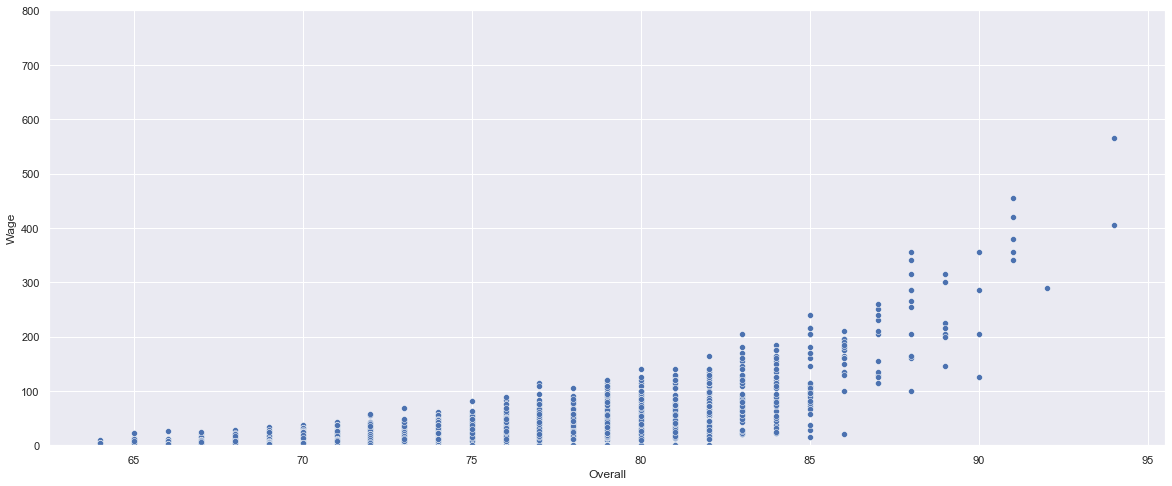

In [25]:
ax = sns.scatterplot(x='Overall', y='Wage',data=dat)
ax.set(ylim=(0,800))

In [26]:
dat["Wage"].max()

565

# Tactics Analysis and Player Recommendation

In [27]:
def tacticsFormation(data, team, tactics, threshold=0, method='best'):
    '''
    This function finds out if the given team have a formation that can use the input tactics with involved players
    satisfying the threshold value. 
    param data: DataFrame
    param team: which team
    param tactics: 3 choices:
                    (1) crossing, need LM, RM, LW, RW, ST; 
                    (2) Tiki-taka, need CM, CAM, ST; 
                    (3) long passing, need LB, RB, CB, ST
    param threshold: min skill value for the players involved in this tactics. 0 means using the median as the threshold value
    param method:   'best': try to find the best player for each position
                    'complete': try to find a complete formation, which means probably put a player in his non-favorite position
    '''
    assert isinstance(data, pd.DataFrame)
    assert isinstance(team, str) and team in data['Club'].values
    assert isinstance(tactics, str) and tactics in set(['Crossing', 'Tiki-taka', 'Long passing'])
    assert isinstance(threshold, int) and 0 <= threshold <= 100
    
    players = data.loc[data['Club'] == team]
    formation = []
    satisfied = dict()
    unsatisfied = set()
    
    if tactics == 'Crossing':
        positions = ['ST', 'LM', 'RM', 'LW', 'RW']
    elif tactics == 'Tiki-taka':
        positions = ['CM', 'CAM', 'ST']
    else:
        positions = ['LB', 'RB', 'CB', 'ST']
        
    for pos in positions:
        curThres = data[pos].median() if threshold == 0 else threshold
        formation.append([pos, players.loc[players[pos]>=curThres].sort_values(by=[pos], ascending=False)])
        if len(formation[-1][1]) == 0:
            formation.pop()
            unsatisfied.add(pos)
    if method == 'best':
        formation.sort(key=lambda x:x[1][x[0]][x[1].index[0]], reverse=True)
    else:
        formation.sort(key=lambda x:len(x))
        
    for pos, posPlayers in formation:
        for i in posPlayers.index:
            if posPlayers.loc[i]['Name'] not in satisfied.values():
                satisfied[pos] = posPlayers.loc[i]['Name']
                break
        if not pos in satisfied.keys():
            unsatisfied.add(pos)
    
    for k in satisfied.keys():
        curPlayer = players.loc[players['Name']==satisfied[k]]
        curPlayer.loc[curPlayer.index[0],'Position'] = k
        satisfied[k] = curPlayer
    return satisfied, list(unsatisfied)
    
    

Senario 1 - FC Barcelona & Long passing, picking up players from the current team satisfying the tactics requirement

In [28]:
satisfied, unsatisfied = tacticsFormation(dat, 'FC Barcelona', 'Long passing', threshold=0)
for k in satisfied.keys():
    print(satisfied[k]['Position'].values, ' ', satisfied[k]['Name'].values)
print(unsatisfied)

['ST']   ['L. Messi']
['LB']   ['Jordi Alba']
['RB']   ['S. Umtiti']
['CB']   ['Piqué']
[]


/Applications/DevelopTools/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


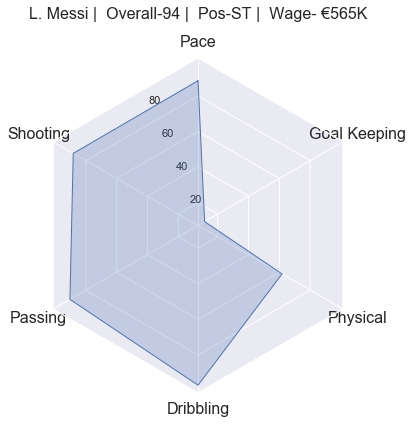

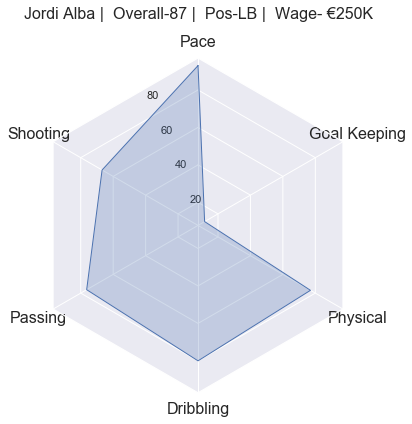

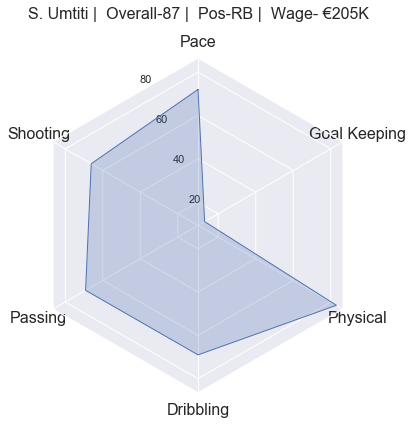

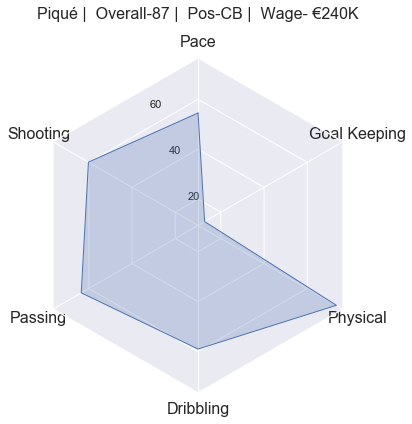

In [29]:
for k in satisfied.keys():
    radarPlot(satisfied[k], save=True, fname='FC_Barcelona_Long_passing')

In [30]:
def recommendPlayers(data, positions, budgets=[], threshold=0, top=5, team='None'):
    '''
    This function recommend the players according to the given positions and corresponding budgets
    
    param data: DataFrame
    param positions: the positions needed
    param budgets: the budgets correspond to each of the players
    param threshold: threshold value for selecting players
    param top: top number of players of output
    param team: prevent from recommending players from the given team
    '''
    assert isinstance(data, pd.DataFrame)
    assert isinstance(positions, list) and len(positions)>0
    assert isinstance(budgets, list) and (len(budgets) == 0 or len(positions) == len(budgets))
    assert isinstance(threshold, int) and threshold>=0
    assert isinstance(top, int) and top>0
    assert isinstance(team, str)
    
    if len(budgets)==0:
        budgets = [data['Wage'].max()]*len(positions)
    
    found = dict()
    notFound = set()
    
    for i in range(len(positions)):
        curThres = data[positions[i]].median() if threshold == 0 else threshold
        
        if team != 'None':
            candidate = data.loc[(data['Club']!=team) & (data['Position']==positions[i]) & (data[positions[i]]>=curThres) & (data['Wage']<=budgets[i])].sort_values(by=[positions[i]], ascending=False)
        else:
            candidate = data.loc[(data[positions[i]]>=curThres) & (data['Position']==positions[i]) & (data['Wage']<=budgets[i])].sort_values(by=[positions[i]], ascending=False)
       
        if len(candidate)>top:
            candidate = candidate.head(top)
        candidate['Position'] = positions[i]
        if len(candidate) == 0:
            notFound.add(positions[i])
        else:
            found[positions[i]] = candidate
    
    return found, notFound

Senario 2 - Juventus & Crossing, players from the current team are not good enough, need recommendation from the whole market

In [31]:
satisfied, unsatisfied = tacticsFormation(dat, 'Juventus', 'Crossing', threshold=85)
for k in satisfied.keys():
    print(satisfied[k]['Position'].values, ' ', satisfied[k]['Name'].values)
print(unsatisfied)

['ST']   ['Cristiano Ronaldo']
['LW']   ['P. Dybala']
['RW']   ['Douglas Costa']
['RM', 'LM']


/Applications/DevelopTools/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [32]:
found, notFound = recommendPlayers(dat, unsatisfied, [], threshold=80, top=3, team='Juventus')
for k in found.keys():
    print(found[k]['Name'])
print(notFound)

25      K. Mbappé
26       M. Salah
122    F. Thauvin
Name: Name, dtype: object
68       M. Reus
86          Koke
97    I. Perišić
Name: Name, dtype: object
set()


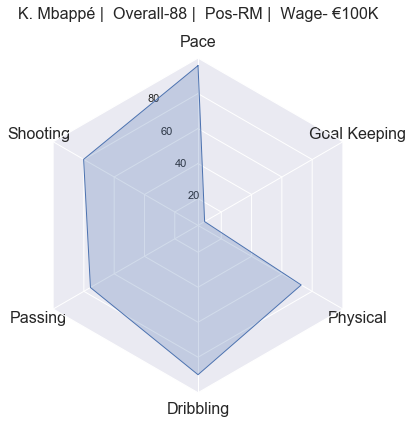

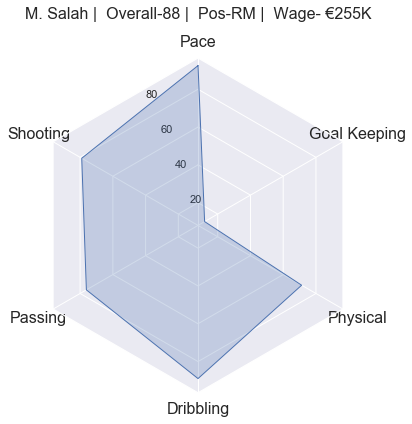

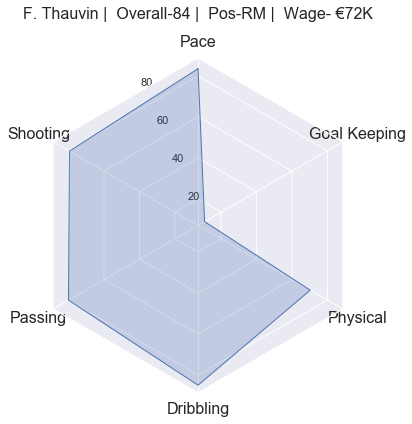

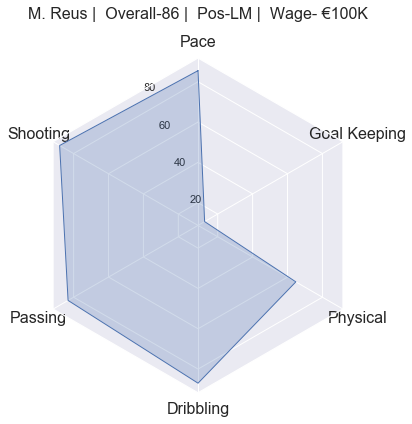

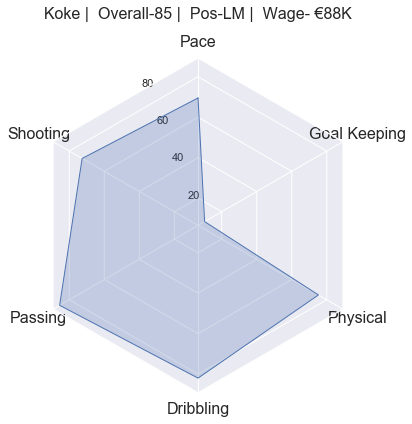

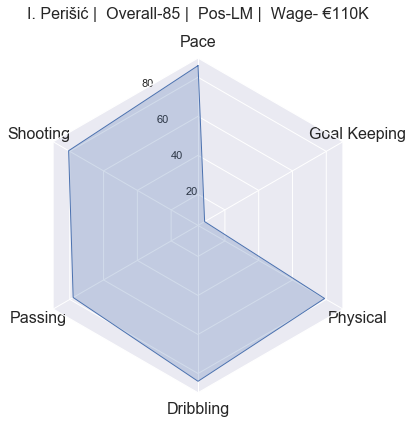

In [33]:
for k in found.keys():
    radarPlot(found[k], save=True, fname=k)